In [2]:
import sys
print(sys.executable)

/grad/sguotong/.conda/envs/.cavGZ_venv/bin/python


In [3]:
from bessel import initialize_bessel_table, BesselJZeros
initialize_bessel_table(10, 10)

# print out a table of BesselJZeros
print("BesselJZeros (m,n): \n")
print("k |  J_0(x) |  J_1(x) |  J_2(x) |  J_3(x) |  J_4(x) |  J_5(x) |\n")
for n in range(1, 6):
    str_out = f"{n} |"
    for m in range(0, 6):
        str_out += f" {BesselJZeros(m, n):.5f} |"

    print(str_out)

print("\n https://mathworld.wolfram.com/BesselFunctionZeros.html")

BesselJZeros (m,n): 

k |  J_0(x) |  J_1(x) |  J_2(x) |  J_3(x) |  J_4(x) |  J_5(x) |

1 | 2.40483 | 3.83171 | 5.13562 | 6.38016 | 7.58834 | 8.77148 |
2 | 5.52008 | 7.01559 | 8.41724 | 9.76102 | 11.06471 | 12.33860 |
3 | 8.65373 | 10.17347 | 11.61984 | 13.01520 | 14.37254 | 15.70017 |
4 | 11.79153 | 13.32369 | 14.79595 | 16.22347 | 17.61597 | 18.98013 |
5 | 14.93092 | 16.47063 | 17.95982 | 19.40942 | 20.82693 | 22.21780 |

 https://mathworld.wolfram.com/BesselFunctionZeros.html


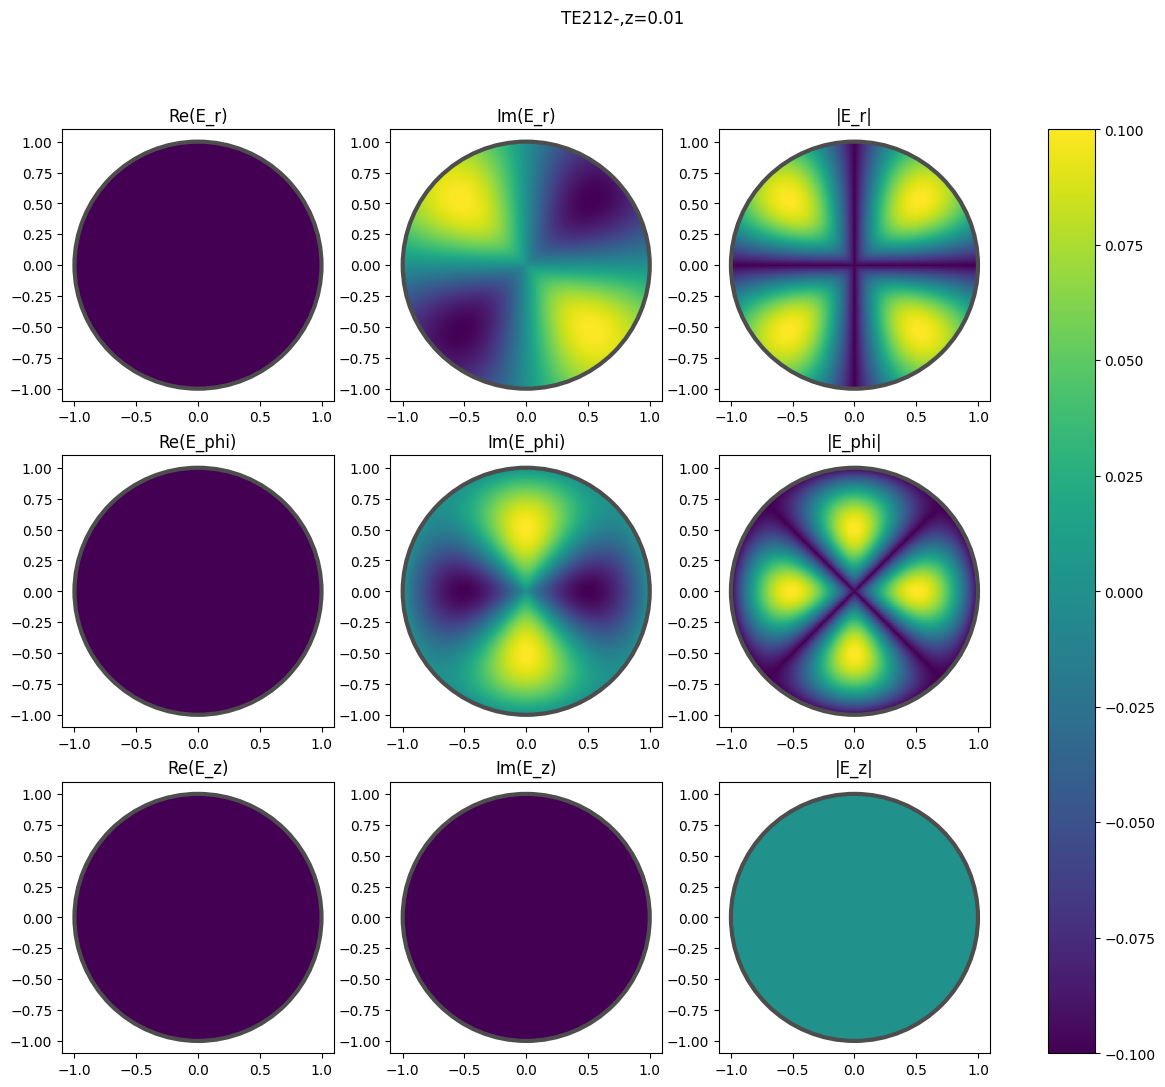

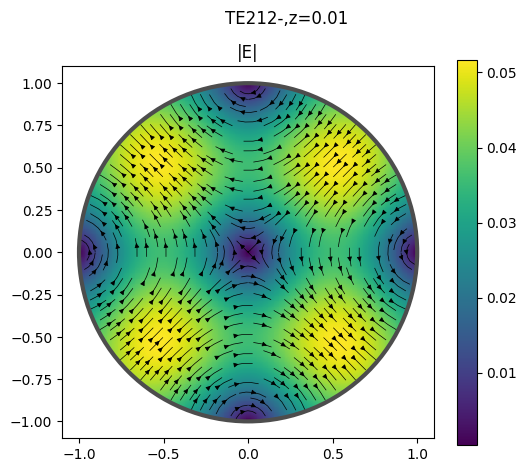

In [4]:
from cavity_modes import CavityModeHelper
import numpy as np
import matplotlib.pyplot as plt

a = 1.0  # radius
L = 1.0  # length
family = "TE"
m, n, p = 2, 1, 2
sign = "-"
cavHelper = CavityModeHelper(a, L)
Er, Ephi, Ez = cavHelper.mode_functions(family, m, n, p, sign)
# plot a slice near z=0
import matplotlib.pyplot as plt
def plot_disk_slice(Fr, Fphi, Fz, a, z0, r_pts=200, ph_pts=200, title="", func_name=""):
    x = np.linspace(-a, a, 2*r_pts)
    y = np.linspace(-a, a, 2*r_pts)
    X, Y = np.meshgrid(x, y, indexing="xy")
    R = np.hypot(X, Y)
    Phi = np.arctan2(Y, X)
    Z = np.full_like(R, z0)
    disk = R <= a
    eps = 1e-6
    # print(X.shape, Y.shape)

    Frv = Fr(R, Phi, Z)
    Fphiv = Fphi(R, Phi, Z)
    Fzv = Fz(R, Phi, Z)

    Fr_real, Fr_imag, Fr_mag = np.real(Frv), np.imag(Frv), np.abs(Frv)
    Fphi_real, Fphi_imag, Fphi_mag = np.real(Fphiv), np.imag(Fphiv), np.abs(Fphiv)
    Fz_real, Fz_imag, Fz_mag = np.real(Fzv), np.imag(Fzv), np.abs(Fzv)
    norm = np.sqrt(Fr_mag**2 + Fphi_mag**2 + Fz_mag**2)

    # plot 3*3 subplots of magnitude
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))
    comp_dict = {
        "r": (Fr_real, Fr_imag, Fr_mag),
        "phi": (Fphi_real, Fphi_imag, Fphi_mag),
        "z": (Fz_real, Fz_imag, Fz_mag)
    }
    for i, key in enumerate(["r", "phi", "z"]):
        real, imag, mag = comp_dict[key]
        real = np.where(disk, real, np.nan)
        imag = np.where(disk, imag, np.nan)
        mag = np.where(disk, mag, np.nan)

        ax_real, ax_imag, ax_mag = axs[i, 0], axs[i, 1], axs[i, 2]
        plt_real = ax_real.pcolormesh(X, Y, real, shading="auto", cmap="viridis")
        ax_real.add_patch(plt.Circle((0, 0), a, edgecolor="0.3", facecolor="none", linewidth=3, zorder=3))
        ax_real.set_aspect("equal", "box")
        ax_real.set_xlim(-1.1*a, 1.1*a); ax_real.set_ylim(-1.1*a, 1.1*a)
        ax_real.set_title(f"Re({func_name}_{key})")

        plt_imag = ax_imag.pcolormesh(X, Y, imag, shading="auto", cmap="viridis")
        ax_imag.add_patch(plt.Circle((0, 0), a, edgecolor="0.3", facecolor="none", linewidth=3, zorder=3))
        ax_imag.set_aspect("equal", "box")
        ax_imag.set_xlim(-1.1*a, 1.1*a); ax_imag.set_ylim(-1.1*a, 1.1*a)
        ax_imag.set_title(f"Im({func_name}_{key})")

        plt_mag = ax_mag.pcolormesh(X, Y, mag, shading="auto", cmap="viridis")
        ax_mag.add_patch(plt.Circle((0, 0), a, edgecolor="0.3", facecolor="none", linewidth=3, zorder=3))
        ax_mag.set_aspect("equal", "box")
        ax_mag.set_xlim(-1.1*a, 1.1*a); ax_mag.set_ylim(-1.1*a, 1.1*a)
        ax_mag.set_title(f"|{func_name}_{key}|")

    fig.colorbar(plt_mag, ax=axs.ravel().tolist())
    plt.suptitle(title or f"Disk slice at z={z0:.3g}")
    plt.show()

    # one plot of the norm
    fig2, ax2 = plt.subplots(figsize=(6, 5))
    norm = np.where(disk, norm, np.nan)
    plt_norm = ax2.pcolormesh(X, Y, norm, shading="auto", cmap="viridis", zorder=1)
        # vector plot on top of norm plot
    Fx = Fr_imag * np.cos(Phi) - Fphi_imag * np.sin(Phi)
    Fy = Fr_imag * np.sin(Phi) + Fphi_imag * np.cos(Phi)
    Fxy_mag = np.sqrt(Fx**2 + Fy**2) + eps
    Fx /= Fxy_mag
    Fy /= Fxy_mag
            # mask outside the disk and avoid singular arrows near |F|≈0

    U = np.where(disk, Fx, np.nan)
    V = np.where(disk, Fy, np.nan)
    M = np.where(disk, Fxy_mag, np.nan)
            # normalize stream directions
    L = np.sqrt(U**2 + V**2)
    U = U / (L + eps)
    V = V / (L + eps)
    U[L < eps] = np.nan; V[L < eps] = np.nan
    sp = ax2.streamplot(
        X, Y, U, V,
        density=1.2,
        color="k",
        linewidth=0.5,
        arrowsize=0.7,
        minlength=0.05, maxlength=0.1,
        integration_direction="both",
        broken_streamlines=False,
        zorder=2,
    )

    ax2.add_patch(plt.Circle((0, 0), a, edgecolor="0.3", facecolor="none", linewidth=3, zorder=3))
    ax2.set_aspect("equal", "box")
    ax2.set_xlim(-1.1*a, 1.1*a); ax2.set_ylim(-1.1*a, 1.1*a)
    ax2.set_title(f"|{func_name}|")
    fig2.colorbar(plt_norm, ax=ax2)
    plt.suptitle(title or f"Disk slice at z={z0:.3g}")
    plt.show()

z0 = 0.01*L
plot_disk_slice(Er, Ephi, Ez, a, z0, title=f"{family}{m}{n}{p}{sign},z={z0:.3g}", func_name="E")

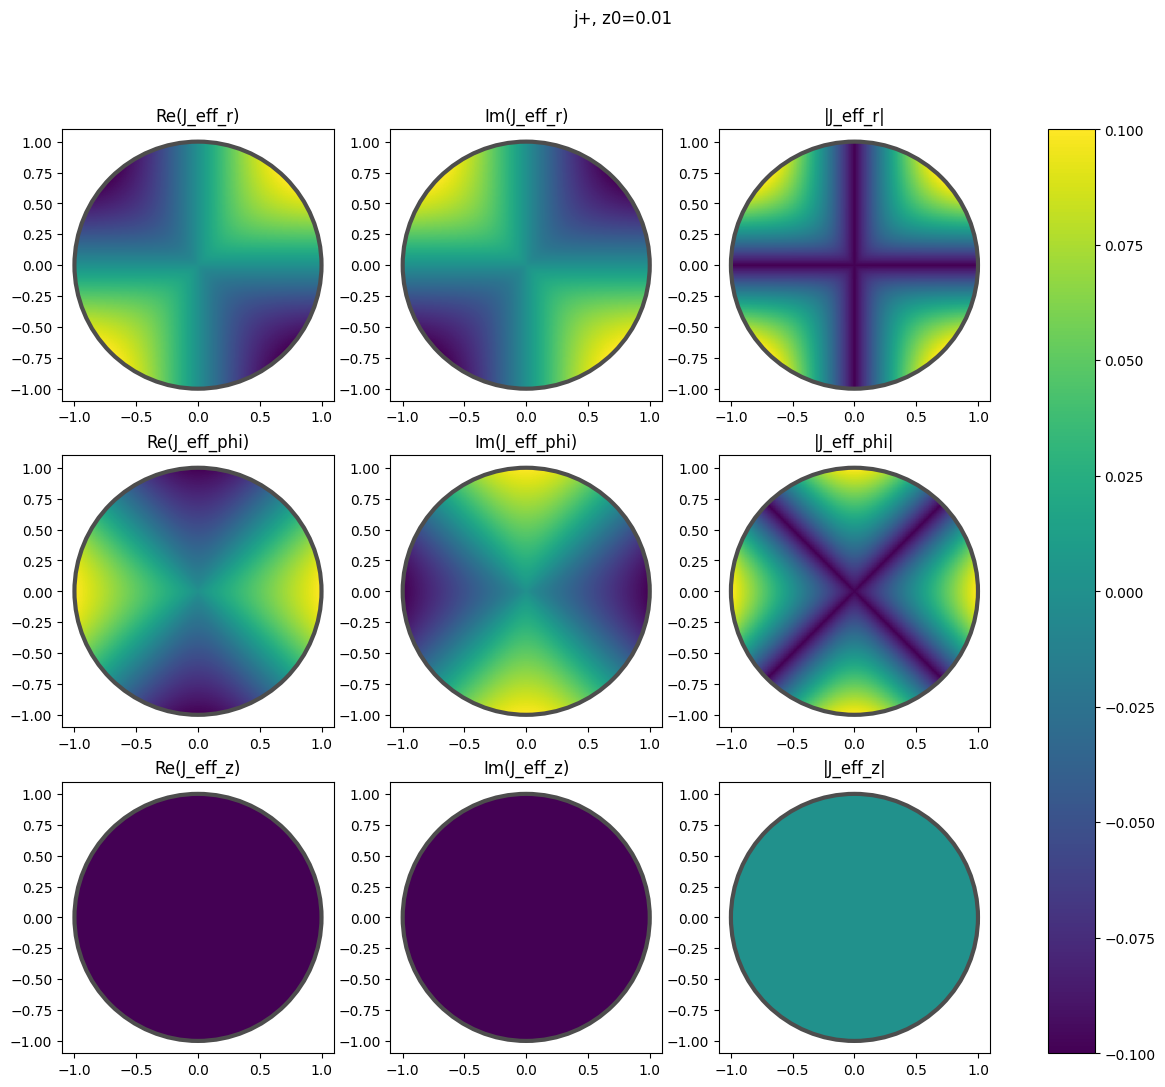

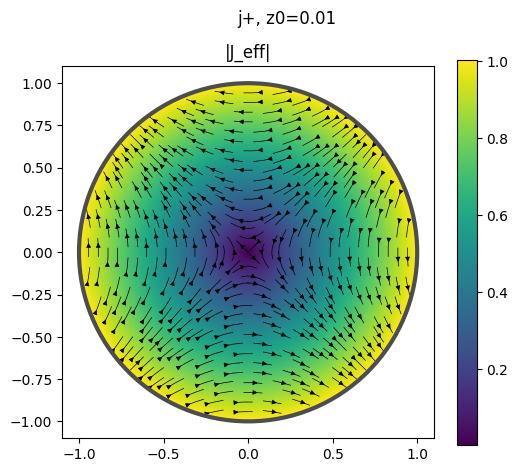

In [5]:
from j_eff import j_eff

a = 1.0  # radius
L = 1.0  # length
pol = "+"
z0 = 0.01*L
wg = 2*np.pi/L

Jr, Jphi, Jz = j_eff(pol, wg)
plot_disk_slice(Jr, Jphi, Jz, a, z0, title=f"j{pol}, z0={z0:.3g}", func_name="J_eff")